In [9]:
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
df = pd.read_csv("data/mad1.csv", encoding="utf-8")

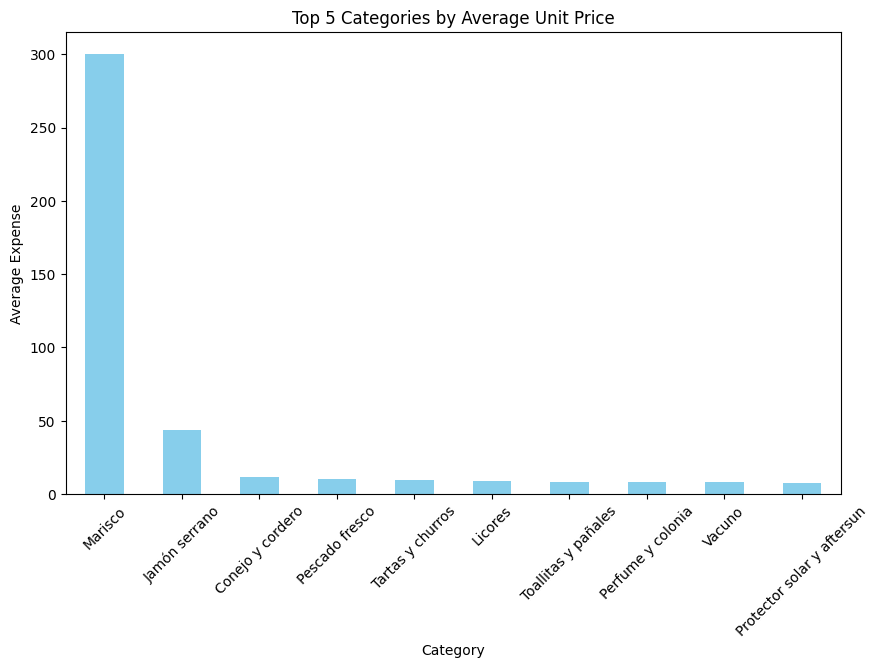

In [11]:
category_prices = df.groupby("category")["unit_price"].mean()
top_categories = category_prices.nlargest(10)

plt.figure(figsize=(10, 6))
top_categories.plot(kind="bar", color="skyblue")
plt.title("Top 5 Categories by Average Unit Price")
plt.xlabel("Category")
plt.ylabel("Average Expense")
plt.xticks(rotation=45)
plt.show()

In [12]:
categories_to_filter = ["Marisco", "Jamón serrano"]
category_products = df[df["category"].isin(categories_to_filter)]
category_products.sort_values("unit_price", ascending=False).head(5)

,id,warehouse,language,ean,name,slug,legal_name,unit_price,bulk_price,is_discounted,...,is_new,is_pack,pack_size,description,minimum_amount,weight,brand,origin,supplier,category
1997,24706.0,mad1,es,8480000247063,Alistado mediano congelado,alistado-mediano-congelado-granel,NaN,2965.05,29.95,False,...,False,False,NaN,Alistado mediano congelado,0,NaN,NaN,NaN,NaN,Marisco
4164,24706.0,mad1,es,8480000247063,Alistado mediano congelado,alistado-mediano-congelado-granel,NaN,2965.05,29.95,False,...,False,False,NaN,Alistado mediano congelado,0,NaN,NaN,NaN,NaN,Marisco
2010,24487.0,mad1,es,8480000244871,Bocas de cangrejo pequeñas congeladas,bocas-cangrejo-pequenas-congeladas-granel,NaN,1960.20,19.80,False,...,False,False,NaN,Bocas de cangrejo pequeñas congeladas,0,NaN,NaN,NaN,NaN,Marisco
4180,24487.0,mad1,es,8480000244871,Bocas de cangrejo pequeñas congeladas,bocas-cangrejo-pequenas-congeladas-granel,NaN,1960.20,19.80,False,...,False,False,NaN,Bocas de cangrejo pequeñas congeladas,0,NaN,NaN,NaN,NaN,Marisco
4169,24701.0,mad1,es,8480000247018,Gamba arrocera Hacendado congelada,gamba-arrocera-hacendado-congelada-granel,NaN,1480.05,14.95,False,...,False,False,NaN,Gamba arrocera Hacendado congelada,0,NaN,Hacendado,NaN,NaN,Marisco


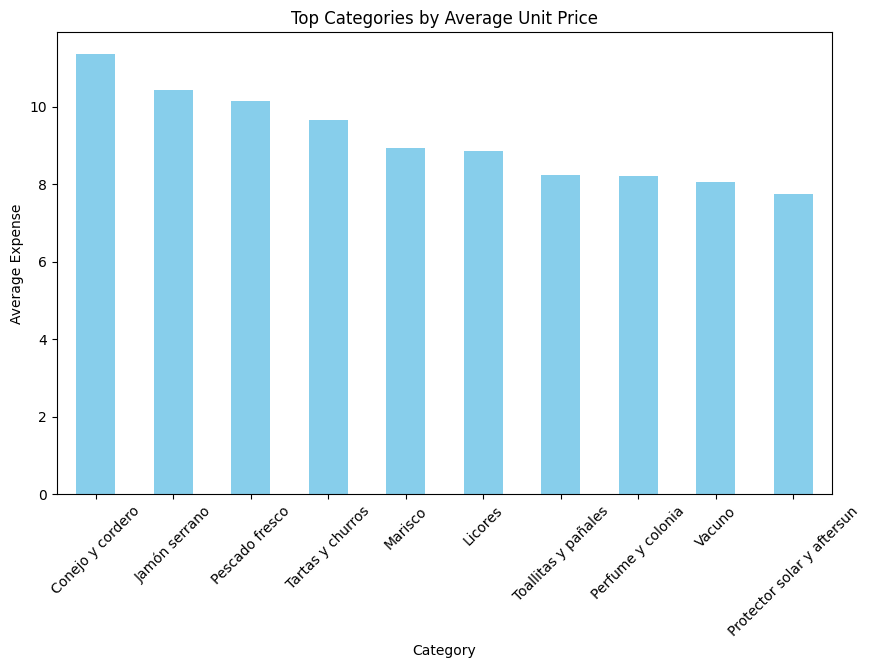

In [13]:
category_prices = df[df["unit_price"] < 75].groupby("category")["unit_price"].mean()
top_categories = category_prices.nlargest(10)

plt.figure(figsize=(10, 6))
top_categories.plot(kind="bar", color="skyblue")
plt.title("Top Categories by Average Unit Price")
plt.xlabel("Category")
plt.ylabel("Average Expense")
plt.xticks(rotation=45)
plt.show()

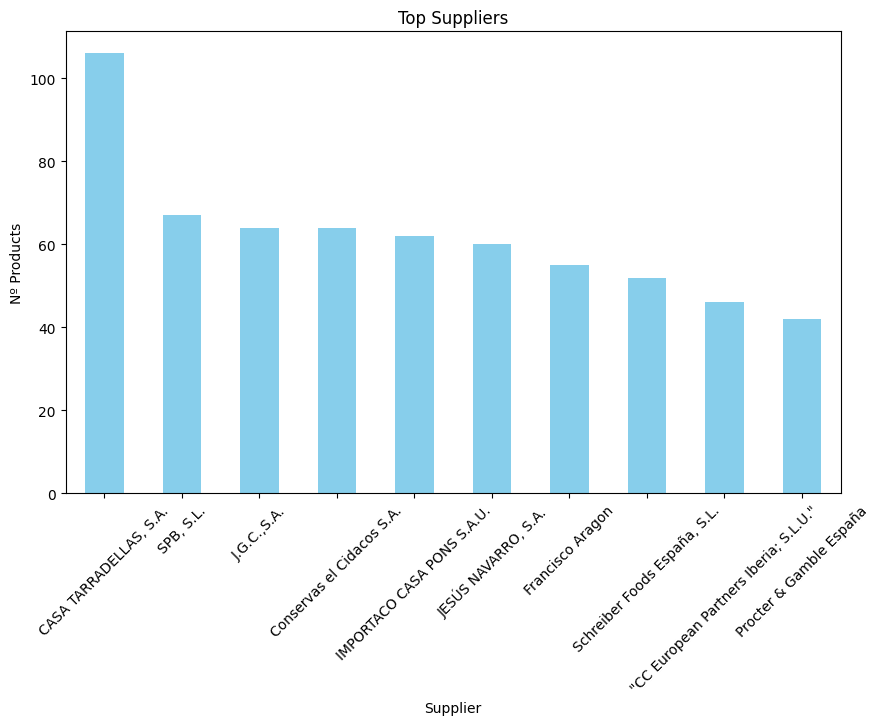

In [14]:
supplier_counts = df["supplier"].value_counts()

supplier_counts_df = supplier_counts.reset_index()
supplier_counts_df.columns = ["supplier", "count"]
top_suppliers = supplier_counts.nlargest(10)

plt.figure(figsize=(10, 6))
top_suppliers.plot(kind="bar", color="skyblue")
plt.title("Top Suppliers")
plt.xlabel("Supplier")
plt.ylabel("Nº Products")
plt.xticks(rotation=45)
plt.show()

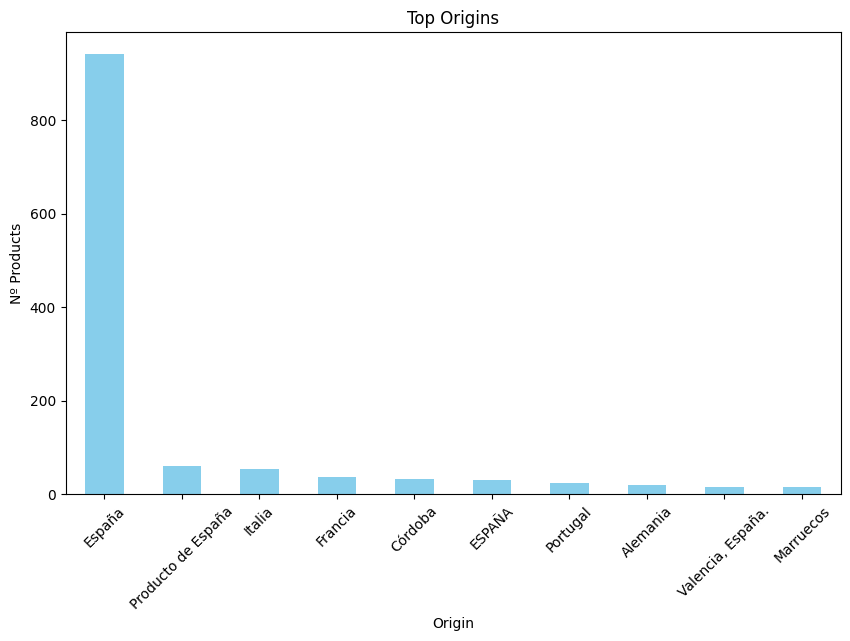

In [15]:
supplier_counts = df["origin"].value_counts()

supplier_counts_df = supplier_counts.reset_index()
supplier_counts_df.columns = ["origin", "count"]
top_suppliers = supplier_counts.nlargest(10)

plt.figure(figsize=(10, 6))
top_suppliers.plot(kind="bar", color="skyblue")
plt.title("Top Origins")
plt.xlabel("Origin")
plt.ylabel("Nº Products")
plt.xticks(rotation=45)
plt.show()

C:\Users\Joel Taylor\AppData\Local\Temp\ipykernel_2396\1340019370.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alcoholic_drinks["alcohol_content_per_liter"] = (alcoholic_drinks["alcohol_by_volume"] / 100) * df["weight"]
C:\Users\Joel Taylor\AppData\Local\Temp\ipykernel_2396\1340019370.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alcoholic_drinks["alcohol_per_euro"] = alcoholic_drinks["alcohol_content_per_liter"] / alcoholic_drinks["unit_price"]


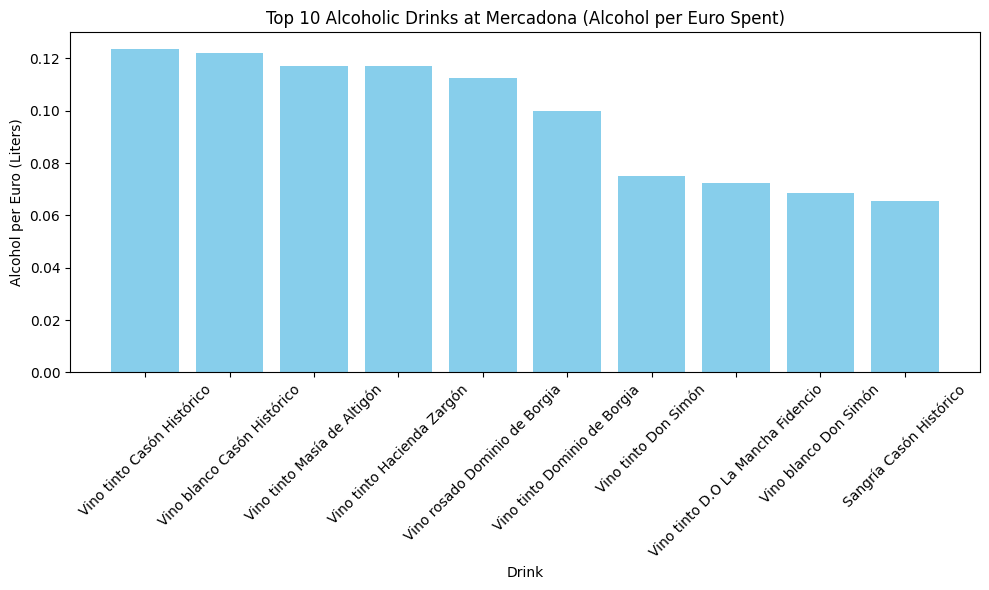

In [16]:
# Selecting rows where "age_check" column is True
alcoholic_drinks = df[df["age_check"]]

# Convert alcohol percentage to decimal and calculate alcohol content per liter
alcoholic_drinks["alcohol_content_per_liter"] = (alcoholic_drinks["alcohol_by_volume"] / 100) * df["weight"]

# Calculate alcohol per euro spent
alcoholic_drinks["alcohol_per_euro"] = alcoholic_drinks["alcohol_content_per_liter"] / alcoholic_drinks["unit_price"]

# Sort drinks by alcohol per euro ratio
alcoholic_drinks = (
    alcoholic_drinks.sort_values(by="alcohol_per_euro", ascending=False)
    .reset_index(drop=True)
    .nlargest(10, "alcohol_per_euro")
)

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(alcoholic_drinks["name"], alcoholic_drinks["alcohol_per_euro"], color="skyblue")
plt.title("Top 10 Alcoholic Drinks at Mercadona (Alcohol per Euro Spent)")
plt.xlabel("Drink")
plt.ylabel("Alcohol per Euro (Liters)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()